# Boston housing: a regression example


The objective is to predict the house price in a certain Boston suburb (in the 1970s).

In [1]:
# Download the data

from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 3us/step


In [2]:
print(train_data.shape[0], 'training samples')
print(test_data.shape[0], 'test samples')

404 training samples
102 test samples


### Sample features (14 in total):

        
    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's

In [3]:
print(train_data[0]) # features of the first training sample
print(train_targets[0]) # target prize (in thousands of dollars) of the first training sample

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


In [4]:
# Normalize the data and keep 300 samples for training (rest for validation)

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

partial_train_data = train_data[:300]
partial_train_targets = train_targets[:300]
val_data = train_data[300:]
val_targets = train_targets[300:]

In [5]:
# Build the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu',
            input_shape=(train_data.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [6]:
# Train the model for 200 epochs

history = model.fit(partial_train_data, partial_train_targets,
                    epochs=200, batch_size=1, verbose=0,
                    validation_data = (val_data, val_targets))

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


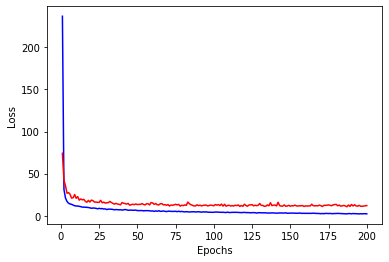

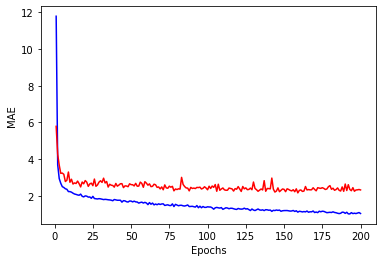

In [8]:
# Plot the training + validation loss and mean absolute error

import matplotlib.pyplot as plt

print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mae']
val_mae = history.history['val_mae']

time = range(1,len(loss)+1)

plt.plot(time, loss, 'b-')
plt.plot(time, val_loss, 'r-')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(time, mae, 'b-')
plt.plot(time, val_mae, 'r-')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

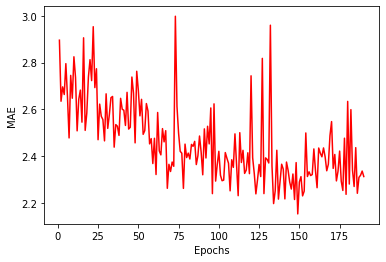

In [9]:
# Cut off the first few data points

short_val_mae = val_mae[10:]

plt.plot(range(1,len(short_val_mae)+1), short_val_mae, 'r-')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

In [ ]:
# Smoothen the previous curve for clarity

def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_val_mae = smooth_curve(val_mae[10:])

plt.plot(range(1, len(smooth_val_mae) + 1), smooth_val_mae)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [ ]:
# Build a fresh model ...

model = Sequential()
model.add(Dense(64, activation='relu',
                       input_shape=(train_data.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
# ... and train it for a shorter time for less overfitting 
# (now with all the training data, including the samples previously used for validation)

history = model.fit(train_data, train_targets,
                    epochs=125, batch_size=1, verbose=0)

In [ ]:
# Test the model with new unseen data

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
# Mean average error of the test samples

test_mae_score

In [ ]:
# Taking a look at test data predictions versus true targets

results = model.predict(test_data)

for i in range(len(results)):
    print(test_targets[i], results[i])